# Machine Learning Notebook 4: Polynomial Regression

### Compiled by Amit Purswani
LinkedIn: https://www.linkedin.com/in/amit-purswani-2a073777/

Repositories
1. Data Analysis:
https://github.com/kranemetal/Data-Analysis-Projects

2. Machine Learning:
https://github.com/kranemetal/MachineLearning

### Simple Linear Regression
y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub>
### Multiple Linear Regression
y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ...... + b<sub>n</sub>x<sub>n</sub>
### Polynomial Regression
y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>1</sub><sup>2</sup> + ...... + b<sub>n</sub>x<sub>1</sub><sup>n</sup>

### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [6]:
df = pd.read_csv('C:\\Users\krane\Desktop\datasets\Position_Salaries.csv')

### Basic sanity checks on dataset

In [8]:
df.shape

(10, 3)

In [9]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [11]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [12]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [13]:
df['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [14]:
df['Position'].value_counts()

Senior Partner       1
C-level              1
Manager              1
Junior Consultant    1
Partner              1
Senior Consultant    1
CEO                  1
Business Analyst     1
Country Manager      1
Region Manager       1
Name: Position, dtype: int64

In [15]:
df['Position'].nunique()

10

In [16]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Splitting features and target variable

In [23]:
x = df.iloc[:,1:-1].values # picking only second column as it is ready-made encoding of column 1, choosing both would be redundancy
y = df.iloc[:,-1].values # picking last column salary as target variable

<b>Note:</b> we will use whole dataset for training as it is only 10 records

### Training Linear Regression Model on dataset

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

### Training Polynomial Model on dataset

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) #We are choosing just degree 2 for polynomial
x_poly = poly_reg.fit_transform(x) #We need to create this x variable with power 2
lin_reg_2 = LinearRegression() #make a new object with LinearRegression for fitting
lin_reg_2.fit(x_poly, y) #Fit on the newly created feature with power 2

LinearRegression()

### Visualize Linear Regression result

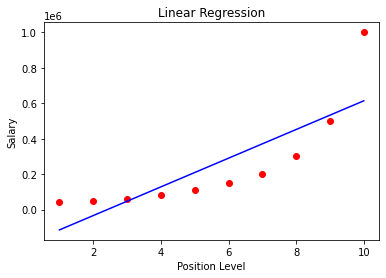

In [31]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

<b>Note:</b> Here, Linear Regression model is used to predict for data more suited for Polynomial model.

### Visualize Polynomial Regression result

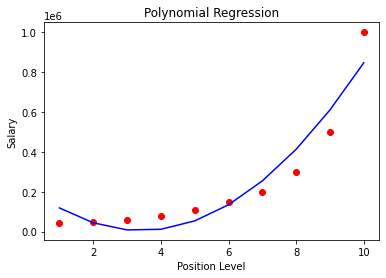

In [39]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(x_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

<b>Note:</b> Here, Polynomial Regression model is used to predict and we see a good fit.

### Now we will train the Polynomial Model with Degree 4

In [34]:
poly_reg_4 = PolynomialFeatures(degree=4) #We are choosing degree 4 for polynomial
x_poly_4 = poly_reg_4.fit_transform(x) #We need to create this x variable with power 4
lin_reg_4 = LinearRegression() #make a new object with LinearRegression for fitting
lin_reg_4.fit(x_poly_4, y) #Fit on the newly created feature with power 4

LinearRegression()

### Visualize Polynomial Regression(degree 4) result

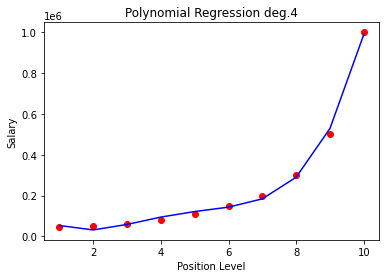

In [35]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_4.predict(x_poly_4), color='blue')
plt.title('Polynomial Regression deg.4')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

<b>Note:</b> Here, Polynomial Regression model with degree 4 is used to predict and we see an even better fit than with polynomial model of degree 2.

### Predict for new level 6.5 with Linear Regression

In [37]:
lin_reg.predict([[6.5]]) # [list] is with single square bracket, [[array]] is with double square bracket

array([330378.78787879])

This prediction is way off, hence incorrect.

In [38]:
lin_reg_4.predict(poly_reg_4.fit_transform([[6.5]]))

array([158862.45265153])

As per available data, Salary for Level 6 is <b>150,000.</b>
Here, for level 6.5 with experience we have predicted a salary of <b>158,862.</b> This seems much reasonable and natural.

### <center>The End